In [1]:
from google.colab import files
uploade=files.upload()

Saving credits.csv to credits.csv


In [3]:
import numpy as np
import pandas as pd

In [4]:
credits = pd.read_csv('credits.csv')

In [5]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [2]:
from google.colab import files
uploade=files.upload()

Saving movies_metadata.csv to movies_metadata.csv


In [6]:
meta = pd.read_csv('movies_metadata.csv')

<ipython-input-6-62f9bd2bb39b>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('movies_metadata.csv')


In [7]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [8]:

meta['year'] = meta['release_date'].dt.year

In [9]:
meta['year'].value_counts().sort_index()

,count
year,
1874.0,1
1878.0,1
1883.0,1
1887.0,1
1888.0,2
...,...
2015.0,1905
2016.0,1604
2017.0,532


In [10]:
# Getting only 2017 movies as we already have movies up to the year 2016 in preprocessing 1 file.
# We don't have enough data for the movies from 2018, 2019 and 2020.
# We'll deal with it in the upcoming preprocessing files
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [11]:

new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [12]:
new_meta['id'] = new_meta['id'].astype(int)

In [13]:
data = pd.merge(new_meta, credits, on='id')

In [14]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


In [15]:
# evaluates an expression node or a string containing a Python literal or container display
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [20]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.nan
    else:
        return (st.join(gen))

In [21]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [ ]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [24]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.nan
    else:
        return (casts[0])

In [25]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [26]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.nan
    else:
        return (casts[1])

In [27]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [28]:
data['actor_2_name']

,actor_2_name
0,Javier Bardem
1,Henry Cavill
2,Tom Hiddleston
3,Zoe Saldana
4,William Hurt
...,...
526,Rosa Honkonen
527,Wallace Shawn
528,NaN
529,Sajal Ali


In [29]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.nan
    else:
        return (casts[2])

In [30]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [31]:
data['actor_3_name']

,actor_3_name
0,Geoffrey Rush
1,Gal Gadot
2,Cate Blanchett
3,Dave Bautista
4,Benjamin Walker
...,...
526,Tiitus Rantala
527,Gina Holden
528,NaN
529,Akshaye Khanna


In [32]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.nan
    else:
        return (st.join(dt))

In [33]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [34]:
data['director_name']

,director_name
0,Joachim Rønning Espen Sandberg
1,Zack Snyder
2,Taika Waititi
3,James Gunn
4,Sean McNamara
...,...
526,Hannaleena Hauru
527,Jonathan A. Rosenbaum
528,Beth David Esteban Bravo
529,Ravi Udyawar


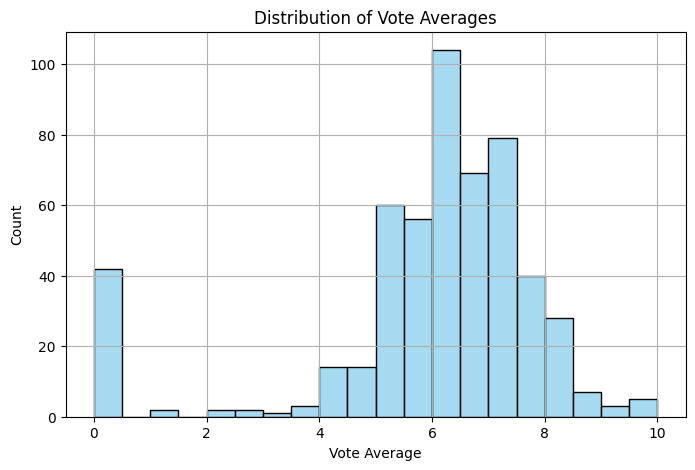

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert 'id' column in 'meta' DataFrame to numeric, handling errors
meta['id'] = pd.to_numeric(meta['id'], errors='coerce')
# Ensure 'vote_average' is present in 'meta' and handle potential NaN values
if 'vote_average' in meta.columns:
    # Merge the DataFrames
    data = pd.merge(data, meta[['id', 'vote_average']], on='id', how='left')
    # Convert 'vote_average' to numeric and replace NaN with 0
    data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce').fillna(0)
    plt.figure(figsize=(8,5))
    sns.histplot(data['vote_average'], bins=20, kde=False, color='skyblue')
    plt.title('Distribution of Vote Averages')
    plt.xlabel('Vote Average')
    plt.ylabel('Count')
    plt.savefig('vote_average_distribution.png')
    plt.grid(True)
    plt.show()
else:
    print("Column 'vote_average' not found in DataFrame 'meta'.")

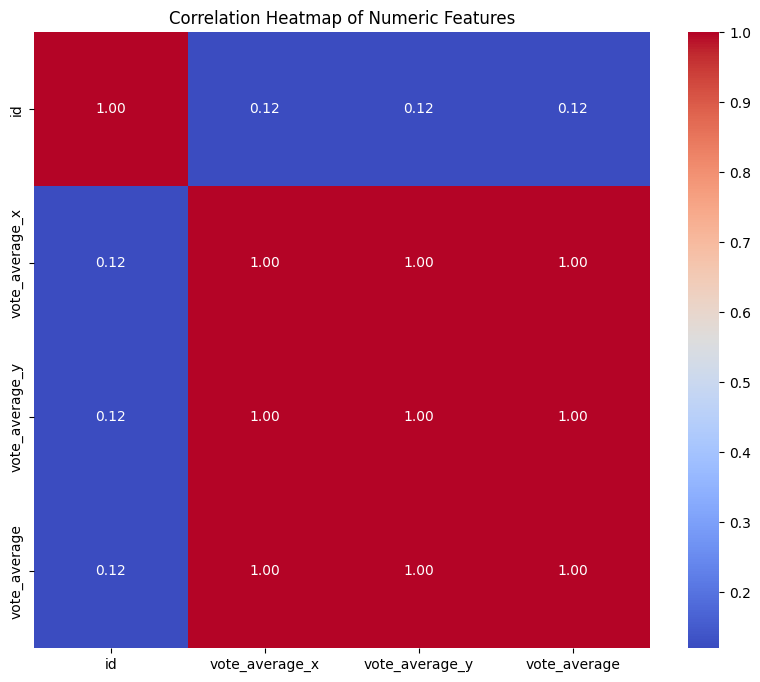

In [52]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
# Exclude the 'year' column before calculating correlation
numeric_df = numeric_df.drop(columns=['year'], errors='ignore')
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig('correlation_heatmap.png')
plt.show()


In [35]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [36]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [37]:
movie.isna().sum()

,0
director_name,4
actor_1_name,22
actor_2_name,55
actor_3_name,70
genres_list,7
title,0


In [38]:
movie = movie.dropna(how='any')

In [39]:
movie.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres_list,0
title,0


In [40]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [41]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [ ]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [42]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter
...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit


In [43]:
old = pd.read_csv('data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [ ]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [ ]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [ ]:
new = old.append(movie)

In [ ]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [ ]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
new.to_csv('new_data.csv',index=False)